In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

In [2]:
def plot_bathymetry(ax, etopo, levels=[-1000], colors='grey', alpha=1):
    lons = etopo.x.values
    lats = etopo.y.values
    lons, lats = np.meshgrid(lons,lats)
    bathy = etopo.z.values
    CS = ax.contour(lons,lats,bathy,levels, transform=ccrs.PlateCarree(),
                    linestyles='solid',colors=colors,alpha=alpha,linewidths=0.5)

In [3]:
lat_min=45
lon_min=-66
lat_max=56
lon_max=-51

etopo = '/home/soontiensn/data/ocn-nav/ETOPO1_Bed_g_gmt4.grd'
detopo = xr.open_dataset(etopo)
esel = detopo.sel(x=slice(lon_min, lon_max), y=slice(lat_min, lat_max))

In [4]:
# Glorys climatology
f='/ocean/handres/glorys12/Allvars_glorys12_1993-2018_daily08.nc'
dg = xr.open_dataset(f)
dsel = dg.isel(depth=0).sel(latitude=slice(lat_min,lat_max), longitude=slice(lon_min, lon_max)).mean(dim='time')
uvel = dsel.uo.values
vvel = dsel.vo.values
lat = dsel.latitude.values
lon = dsel.longitude.values
lon, lat = np.meshgrid(lon, lat)

In [5]:
def plot_quivers(ax, xvel,yvel,lat,lon,st=10):
    mag = np.sqrt(xvel**2+yvel**2)
    mesh=ax.pcolormesh(lon,lat,mag,vmin=0,vmax=1,cmap='YlGnBu_r', transform=ccrs.PlateCarree())
    q=ax.quiver(lon[::st,::st],lat[::st,::st],xvel[::st,::st],yvel[::st,::st],
                  scale=10,color='lightgrey', transform=ccrs.PlateCarree())
    ax.quiverkey(q,0.1,0.85,0.5,'0.5 m/s',color='black')
    cbar=plt.colorbar(mesh, ax=ax)
    cbar.set_label('speed [m/s]')

In [6]:
d = xr.open_dataset('GL_TS_DC_4402740.nc')
d2 =xr.open_dataset('GL_TS_DC_62028790_4402740.nc')

Text(0.5, 1.0, 'Drifter GL_TS_DC_4402740.nc \n GLORYS12 surface currents - August climatology')

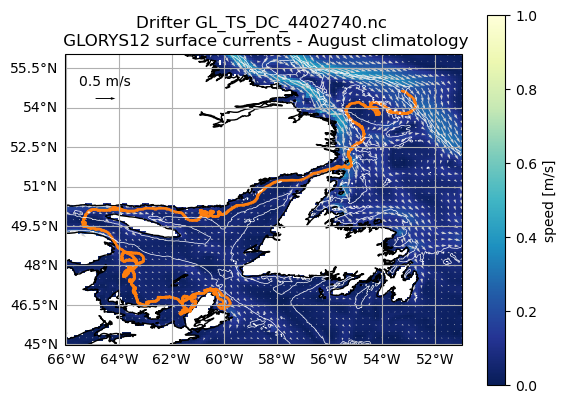

In [7]:
fig, ax = plt.subplots(1,1,subplot_kw={'projection': ccrs.PlateCarree()})
plot_quivers(ax,uvel,vvel,lat, lon,st=3)
ax.plot(d.LONGITUDE, d.LATITUDE, 'C1',marker='.',transform=ccrs.PlateCarree(),ms=1)
#ax.plot(d2.LONGITUDE, d2.LATITUDE, '.',transform=ccrs.PlateCarree())
plot_bathymetry(ax,esel,levels=[-1000,-500, -200], colors='white')
ax.coastlines()
ax.gridlines(draw_labels=['left', 'bottom'])
ax.set_title('Drifter GL_TS_DC_4402740.nc \n GLORYS12 surface currents - August climatology')

In [9]:
fig.savefig('SummerAZMP2023.png', dpi=300,bbox_inches='tight')